In [3]:
from statistics import mean, median
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

def distance(Class1, Class2, p):
    sum = 0
    size_of_sttribute = len(Class1)
    #print("in dist(), # of attr:", size_of_sttribute)
    for i in range(size_of_sttribute-1):
        sum += math.pow(abs(float(Class1[i])-float(Class2[i])),p)
    for i in range(p-1):
        #print("sqrt once")
        sum = math.sqrt(sum)
    return sum

def knn_classifier(x_test, x_train, y_train, k, p):
    #print(x_train)
    #num_of_attribute = len(x_train[0])
    dist = [-100]*len(x_train)
    #print(x_train[1])
    for i in range(len(x_train)):
        #print(i)
        dist[i] = distance(x_test, x_train[i], p)
    # sort dist
    index = sorted(range(len(dist)), key=lambda _k: dist[_k])
    #print("close dist:",index[0])
    #print(dist[index[0]])
    #print("close dist2:",index[1])
    #print(dist[index[1]])
    class2 = 0
    class4 = 0
    for i in range(k):
        if(x_train[index[i]][9] == '2'):
            class2 += 1
        elif(x_train[index[i]][9] == '4'):
            class4 += 1
        else:
            print("unexpected class")
    if class2 > class4:
        return '2';
    else:
        return '4';
    print("shouldn't be here")
    return '0'

def Cross_validation(testing_data, training_data, accuracy, sensitivity, specitivity, p):
    print("size of testing data=",len(testing_data))
    print("size of train data=",len(training_data))
    # take class 2 as positive and class 4 as negative
    positive_acc = 0;
    negative_acc = 0;
    positive_all = 0;
    negative_all = 0;
    _accuracy = []
    _sensitivity = []
    _specitivity = []
    for k in range(1,11):
        correct = 0;
        positive_all = 0;
        negative_all = 0;
        positive_acc = 0;
        negative_acc = 0;
        for i in range(len(testing_data)):
            '''
            if testing_data[i][9] == '2':
                positive_all += 1
            elif testing_data[i][9] == '4':
                negative_all += 1
            else:
                print("calculate all, something wrong")
            '''
            y_pred = knn_classifier(testing_data[i], training_data, training_data, k, p)
            if y_pred == '2' and testing_data[i][9] == '4':
                negative_all += 1
            elif y_pred == '4' and testing_data[i][9] == '2':
                positive_all += 1
            elif y_pred == '2' and testing_data[i][9] == '2':
                positive_acc += 1
                positive_all += 1
            elif y_pred == '4' and testing_data[i][9] == '4':
                negative_acc += 1
                negative_all += 1
            else:
                print("statistic y_pred, something wrong")
        _accuracy.append((positive_acc+negative_acc)/len(testing_data))
        _sensitivity.append(positive_acc/positive_all)
        _specitivity.append(negative_acc/negative_all)
    accuracy.extend(_accuracy)
    sensitivity.extend(_sensitivity)
    specitivity.extend(_specitivity)
    return

fp = open('breast-cancer-wisconsin.data', "r")
index_of_arrtibute = 10
attr_target_list =[]
# this aim to store the average for each attribute, for '?' value
dist = [0]*index_of_arrtibute
#list_of_attribute = [[]] * 9
#print("len of lol=",len(list_of_attribute))

i=0
while True:
    data = fp.readline().split(',')
    if data[0] == '\n' or data[0] == '':break
    #if data[4] == Class_name: #Iris-setosa/ Iris-versicolor/ Iris-virginica/
    print (i,":",data[10])
    i+=1
    #attr_target_list.append(float(data[index_of_arrtibute]))
    context = data[1:10]
    context.append(data[10][0])
    if ('?' in context):
        attr_target_list.append(context)
        #print("?")
    else:
        attr_target_list.append(context)
    # sum the attribute value
    for j in range(index_of_arrtibute):
        if context[j] != '?':
            dist[j] += float(context[j])
#end of read file


0 : 2

1 : 2

2 : 2

3 : 2

4 : 2

5 : 4

6 : 2

7 : 2

8 : 2

9 : 2

10 : 2

11 : 2

12 : 4

13 : 2

14 : 4

15 : 4

16 : 2

17 : 2

18 : 4

19 : 2

20 : 4

21 : 4

22 : 2

23 : 4

24 : 2

25 : 4

26 : 2

27 : 2

28 : 2

29 : 2

30 : 2

31 : 2

32 : 4

33 : 2

34 : 2

35 : 2

36 : 4

37 : 2

38 : 4

39 : 4

40 : 2

41 : 4

42 : 4

43 : 4

44 : 4

45 : 2

46 : 4

47 : 2

48 : 2

49 : 4

50 : 4

51 : 4

52 : 4

53 : 4

54 : 4

55 : 4

56 : 4

57 : 4

58 : 4

59 : 4

60 : 4

61 : 2

62 : 4

63 : 4

64 : 2

65 : 4

66 : 2

67 : 4

68 : 4

69 : 2

70 : 2

71 : 4

72 : 2

73 : 4

74 : 4

75 : 2

76 : 2

77 : 2

78 : 2

79 : 2

80 : 2

81 : 2

82 : 2

83 : 2

84 : 4

85 : 4

86 : 4

87 : 4

88 : 2

89 : 2

90 : 2

91 : 2

92 : 2

93 : 2

94 : 2

95 : 2

96 : 2

97 : 2

98 : 4

99 : 4

100 : 4

101 : 4

102 : 2

103 : 4

104 : 4

105 : 4

106 : 4

107 : 4

108 : 2

109 : 4

110 : 2

111 : 4

112 : 4

113 : 4

114 : 2

115 : 2

116 : 2

117 : 4

118 : 2

119 : 2

120 : 2

121 : 2

122 : 4

123

In [18]:
# auto fill in '?'
dist[:] = [ int(x/len(attr_target_list)) for x in dist]
for i in range(len(attr_target_list)):
    for j in range(len(attr_target_list[0])):
        if attr_target_list[i][j] == '?':
            attr_target_list[i][j] = dist[j]

#print(attr_target_list)
print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))

#implement k-nn to last 20% data, training data is top 80%
pivot = int(len(attr_target_list)*0.8)
print("pivot=",pivot)
correct = 0;
for i in range(pivot,len(attr_target_list)):
    #for i in range(pivot,pivot+1):
    #print("i=",i)
    y_pred = knn_classifier(attr_target_list[i], attr_target_list[:pivot],attr_target_list[:pivot], 2,2)
    #y_pred = '4'
    if y_pred == attr_target_list[i][9] :
        correct += 1
print("correct num =",correct)
print("80/20 accuracy=",correct/(len(attr_target_list)-pivot))

#PART2
#random.shuffle(attr_target_list)
#print(attr_target_list)
print("after suffle:")
print("size of data point:",len(attr_target_list))
print("size of attribute:",len(attr_target_list[0]))

accuracy = []
sensitivity = []
specitivity = []
accuracy2 = []
sensitivity2 = []
specitivity2 = []

total_size = len(attr_target_list)
for i in range(10):# 10-fold
    print(i," testing data:[",int(total_size*i/10),",",int(total_size*(i+1)/10),"]")
    testing_data = attr_target_list[int(total_size*i/10):int(total_size*(i+1)/10)]
    training_data = attr_target_list[0:int(total_size*i/10)]
    training_data.extend(attr_target_list[int(total_size*(i+1)/10):])
    p=1
    Cross_validation(testing_data, training_data, accuracy, sensitivity, specitivity, p)
    p=2
    Cross_validation(testing_data, training_data, accuracy2, sensitivity2, specitivity2, p)
#print(accuracy,"size=",len(accuracy))
#print(sensitivity,"size=",len(sensitivity))
#print(specitivity,"size=",len(specitivity))

size of data point: 699
size of attribute: 10
pivot= 559
correct num = 138
80/20 accuracy= 0.9857142857142858
after suffle:
size of data point: 699
size of attribute: 10
0  testing data:[ 0 , 69 ]
size of testing data= 69
size of train data= 630
size of testing data= 69
size of train data= 630
1  testing data:[ 69 , 139 ]
size of testing data= 70
size of train data= 629
size of testing data= 70
size of train data= 629
2  testing data:[ 139 , 209 ]
size of testing data= 70
size of train data= 629
size of testing data= 70
size of train data= 629
3  testing data:[ 209 , 279 ]
size of testing data= 70
size of train data= 629
size of testing data= 70
size of train data= 629
4  testing data:[ 279 , 349 ]
size of testing data= 70
size of train data= 629
size of testing data= 70
size of train data= 629
5  testing data:[ 349 , 419 ]
size of testing data= 70
size of train data= 629
size of testing data= 70
size of train data= 629
6  testing data:[ 419 , 489 ]
size of testing data= 70
size of tra

p1 accuracy mean: ['0.96', '0.97', '0.96', '0.97', '0.96', '0.97', '0.96', '0.96', '0.96', '0.96']
p1 accuracy sd: ['0.03', '0.03', '0.04', '0.04', '0.05', '0.04', '0.05', '0.04', '0.05', '0.04']
p2 accuracy mean: ['0.95', '0.97', '0.96', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97', '0.96']
p2 accuracy sd: ['0.04', '0.03', '0.04', '0.04', '0.04', '0.03', '0.04', '0.03', '0.04', '0.04']
p1 sensitivity mean: ['0.97', '0.96', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97', '0.97']
p1 sensitivity sd: ['0.03', '0.04', '0.03', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04']
p2 sensitivity mean: ['0.96', '0.96', '0.97', '0.96', '0.97', '0.97', '0.97', '0.96', '0.97', '0.97']
p2 sensitivity sd: ['0.04', '0.03', '0.03', '0.03', '0.04', '0.04', '0.04', '0.04', '0.04', '0.04']
p1 specitivity mean: ['0.93', '0.97', '0.95', '0.96', '0.95', '0.96', '0.95', '0.95', '0.94', '0.95']
p1 specitivity sd: ['0.05', '0.03', '0.07', '0.06', '0.07', '0.06', '0.06', '0.06', '0.08', '0.06']
p2

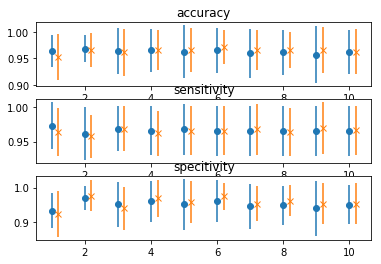

In [34]:
X = np.arange(1,11,1)
X2 = np.arange(1.2,11,1)
s = ['']*10
sA = ['']*10
ax = plt.subplot(3, 1, 1)
ax.set_title("accuracy")
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(accuracy[i::10])
    sA[i] = np.std(accuracy[i::10])
print("p1 accuracy mean:",['%.2f'% elem for elem in s ])
print("p1 accuracy sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(accuracy2[i::10])
    sA[i] = np.std(accuracy2[i::10])
print("p2 accuracy mean:",['%.2f'% elem for elem in s ])
print("p2 accuracy sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

ax = plt.subplot(3, 1, 2)
ax.set_title("sensitivity")
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(sensitivity[i::10])
    sA[i] = np.std(sensitivity[i::10])
print("p1 sensitivity mean:",['%.2f'% elem for elem in s ])
print("p1 sensitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(sensitivity2[i::10])
    sA[i] = np.std(sensitivity2[i::10])
print("p2 sensitivity mean:",['%.2f'% elem for elem in s ])
print("p2 sensitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

ax = plt.subplot(3, 1, 3)
ax.set_title("specitivity")
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(specitivity[i::10])
    sA[i] = np.std(specitivity[i::10])
print("p1 specitivity mean:",['%.2f'% elem for elem in s ])
print("p1 specitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X, s, yerr=sA, fmt='o')
for i in range(10):
    #print(len(accuracy[i::10]))
    s[i] = mean(specitivity2[i::10])
    sA[i] = np.std(specitivity2[i::10])
print("p2 specitivity mean:",['%.2f'% elem for elem in s ])
print("p2 specitivity sd:",['%.2f'% elem for elem in sA ])
plt.errorbar(X2, s, yerr=sA, fmt='x')

plt.show()